In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import pyodbc

In [127]:

%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

In [2]:
!pip install pyMechkar

In [3]:
!pip install sklearn

In [2]:
from pyMechkar import exploreData

In [4]:
### In windows, Using a ODBC DNS (predefined connection name)
conn = pyodbc.connect('DSN=hair_salon_no_shown_ff;Trusted_Connection=yes;')

# Load Data

In [82]:
noshow = pd.read_sql("SELECT * FROM hair_salon_no_shown_ff;",conn) 
noshow.head()

book_tod   book_dow book_category book_staff last_category last_staff  \
0  afternoon  Wednesday         STYLE         JJ       unknown    unknown   
1    morning  Wednesday         COLOR     JOANNE       unknown    unknown   
2    unknown  Wednesday         STYLE         JJ         COLOR     JOANNE   
3  afternoon   Thursday         STYLE      KELLY       unknown    unknown   
4    evening   Saturday         STYLE      KELLY         STYLE      KELLY   

  last_day_services last_receipt_tot   last_dow   last_tod  ...  \
0                 0                0    unknown    unknown  ...   
1                 0                0    unknown    unknown  ...   
2                 2              262  Wednesday    morning  ...   
3                 0                0    unknown    unknown  ...   
4                 1               35   Thursday  afternoon  ...   

  last_prod_flag last_cumrev last_cumbook last_cumstyle last_cumcolor  \
0              0           0            0             0             0   
1              0           0            0             0             0   
2              1         262            2             1             1   
3              0           0            0             0             0   
4              0          35            1             1             0   

  last_cumprod last_cumcancel last_cumnoshow recency noshow  
0            0              0              0       0      0  
1            0              0              0       0      0  
2            2              0              0      35      0  
3            0              0              0       0      0  
4            0              0              0       9      0  

[5 rows x 21 columns]

In [83]:
categoryVariableList = ["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"]
for var in categoryVariableList:
    noshow[var] = noshow[var].astype("category")

In [84]:
numericVariableList = ["last_day_services","last_receipt_tot","last_noshow","last_prod_flag","last_cumrev","last_cumbook","last_cumstyle","last_cumcolor","last_cumprod","last_cumcancel","last_cumnoshow","recency","noshow"]
for var in numericVariableList:
    noshow[var] = noshow[var].astype("float")

# EDA

In [34]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 21 columns):
book_tod             1952 non-null category
book_dow             1952 non-null category
book_category        1952 non-null category
book_staff           1952 non-null category
last_category        1952 non-null category
last_staff           1952 non-null category
last_day_services    1952 non-null float64
last_receipt_tot     1952 non-null float64
last_dow             1952 non-null category
last_tod             1952 non-null category
last_noshow          1952 non-null float64
last_prod_flag       1952 non-null float64
last_cumrev          1952 non-null float64
last_cumbook         1952 non-null float64
last_cumstyle        1952 non-null float64
last_cumcolor        1952 non-null float64
last_cumprod         1952 non-null float64
last_cumcancel       1952 non-null float64
last_cumnoshow       1952 non-null float64
recency              1952 non-null float64
noshow               1952

In [9]:
noshow.describe() # describe data

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
count        1952.000000       1952.000000  1952.000000     1952.000000   
mean            0.545082         35.782679     0.076332        0.114242   
std             0.658514         59.371877     0.265597        0.318186   
min             0.000000          0.000000     0.000000        0.000000   
25%             0.000000          0.000000     0.000000        0.000000   
50%             0.000000          0.000000     0.000000        0.000000   
75%             1.000000         60.000000     0.000000        0.000000   
max             3.000000        382.800000     1.000000        1.000000   

       last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
count  1952.000000   1952.000000    1952.000000    1952.000000   1952.000000   
mean    111.258197      1.906762       1.520492       0.325307      0.487193   
std     207.927702      3.315854       2.756585       0.827646      1.261275   
min       0.000000      0.000000       0.000000       0.000000      0.000000   
25%       0.000000      0.000000       0.000000       0.000000      0.000000   
50%       0.000000      1.000000       0.000000       0.000000      0.000000   
75%     132.000000      2.000000       2.000000       0.000000      0.000000   
max    1276.000000     20.000000      18.000000       7.000000     11.000000   

       last_cumcancel  last_cumnoshow      recency       noshow  
count     1952.000000     1952.000000  1952.000000  1952.000000  
mean         0.280225        0.422643    14.402152     0.114754  
std          0.853646        1.319786    21.079495     0.318807  
min          0.000000        0.000000     0.000000     0.000000  
25%          0.000000        0.000000     0.000000     0.000000  
50%          0.000000        0.000000     1.000000     0.000000  
75%          0.000000        0.000000    27.000000     0.000000  
max          8.000000        9.000000   133.000000     1.000000

In [19]:
from pyMechkar.analysis import Table1

tab1 = Table1(data=noshow,y="noshow")

Begining analysis...
Factorizing... please wait
[*

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\pandas\core\dtypes\missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


*******************
[]
*********************
*********************
['Unable to calcualte the Fisher exact test for variables book_dow and noshow... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last_staff and noshow... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last_day_services and noshow... The p-value may be incorrect', 'Unable to calcualte the Fisher exact test for variables last_dow and noshow... The p-value may be incorrect']
------ Finished in 7.2392332553863525econds -----


In [10]:
tab1.head(40)

NameError: name 'tab1' is not defined

In [18]:
tab1.tail(40)

Variables    Categories                    Population  \
32         last_staff         HOUSE             16.00 (    0.80%)   
33         last_staff         TANYA              4.00 (    0.20%)   
34  last_day_services             0          1,061.00 (   54.40%)   
35  last_day_services             1            726.00 (   37.20%)   
36  last_day_services             2            157.00 (    8.00%)   
37  last_day_services             3              8.00 (    0.40%)   
38   last_receipt_tot     Mean (SD)              35.80 (   59.40)   
39   last_receipt_tot  Median (IQR)      0.00 (    0.00-   60.00)   
41           last_dow       unknown            949.00 (   48.60%)   
42           last_dow      Thursday            220.00 (   11.30%)   
43           last_dow        Friday            218.00 (   11.20%)   
44           last_dow       Tuesday            200.00 (   10.20%)   
45           last_dow      Saturday            173.00 (    8.90%)   
46           last_dow     Wednesday            160.00 (    8.20%)   
47           last_dow        Sunday             31.00 (    1.60%)   
48           last_dow        Monday              1.00 (    0.10%)   
49           last_tod       unknown          1,094.00 (   56.00%)   
50           last_tod     afternoon            321.00 (   16.40%)   
51           last_tod       morning            317.00 (   16.20%)   
52           last_tod       evening            220.00 (   11.30%)   
53        last_noshow             0          1,803.00 (   92.40%)   
54        last_noshow             1            149.00 (    7.60%)   
55     last_prod_flag             0          1,729.00 (   88.60%)   
56     last_prod_flag             1            223.00 (   11.40%)   
57        last_cumrev     Mean (SD)             111.30 (  207.90)   
58        last_cumrev  Median (IQR)      0.00 (    0.00-  132.00)   
60       last_cumbook     Mean (SD)               1.90 (    3.30)   
61       last_cumbook  Median (IQR)      1.00 (    0.00-    2.00)   
63      last_cumstyle     Mean (SD)               1.50 (    2.80)   
64      last_cumstyle  Median (IQR)      0.00 (    0.00-    2.00)   
66      last_cumcolor     Mean (SD)               0.30 (    0.80)   
67      last_cumcolor  Median (IQR)      0.00 (    0.00-    0.00)   
69       last_cumprod     Mean (SD)               0.50 (    1.30)   
70       last_cumprod  Median (IQR)      0.00 (    0.00-    0.00)   
72     last_cumcancel     Mean (SD)               0.30 (    0.90)   
73     last_cumcancel  Median (IQR)      0.00 (    0.00-    0.00)   
75     last_cumnoshow     Mean (SD)               0.40 (    1.30)   
76     last_cumnoshow  Median (IQR)      0.00 (    0.00-    0.00)   
78            recency     Mean (SD)              14.40 (   21.10)   
79            recency  Median (IQR)      1.00 (    0.00-   27.00)   

                    Category_0.0                  Category_1.0  p_value  
32              7.00 (    0.40%)              9.00 (    4.00%)      NaN  
33              4.00 (    0.20%)              0.00 (    0.00%)      NaN  
34            951.00 (   55.00%)            110.00 (   49.10%)      NaN  
35            629.00 (   36.40%)             97.00 (   43.30%)    0.177  
36            140.00 (    8.10%)             17.00 (    7.60%)      NaN  
37              8.00 (    0.50%)              0.00 (    0.00%)      NaN  
38              35.30 (   57.50)              39.60 (   72.20)    0.308  
39      0.00 (    0.00-   60.00)      0.00 (    0.00-   56.20)      NaN  
41            866.00 (   50.10%)             83.00 (   37.10%)      NaN  
42            198.00 (   11.50%)             22.00 (    9.80%)    0.000  
43            182.00 (   10.50%)             36.00 (   16.10%)      NaN  
44            169.00 (    9.80%)             31.00 (   13.80%)      NaN  
45            148.00 (    8.60%)             25.00 (   11.20%)      NaN  
46            142.00 (    8.20%)             18.00 (    8.00%)      NaN  
47             23.00 (    1.30%)              8.00 (    3.60%)      NaN 

In [20]:
noshow.isnull().sum() #missing cheack

book_tod             0
book_dow             0
book_category        0
book_staff           0
last_category        0
last_staff           0
last_day_services    0
last_receipt_tot     0
last_dow             0
last_tod             0
last_noshow          0
last_prod_flag       0
last_cumrev          0
last_cumbook         0
last_cumstyle        0
last_cumcolor        0
last_cumprod         0
last_cumcancel       0
last_cumnoshow       0
recency              0
noshow               0
dtype: int64

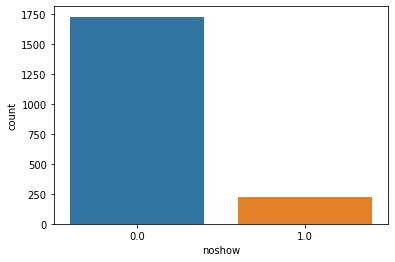

In [21]:
sns.countplot(x='noshow', data=noshow) #Distribution of the dependent variable

The data is imbalanced, there are more 0s than 1s in the dependent variable.

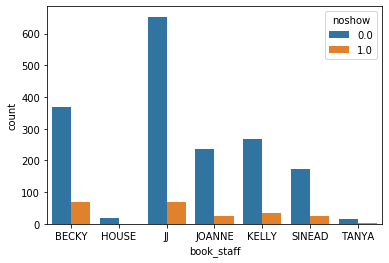

In [13]:
sns.countplot(x='book_staff', hue = "noshow", data=noshow)

According to the graph, Becky gets proportionally more no-shows than others.

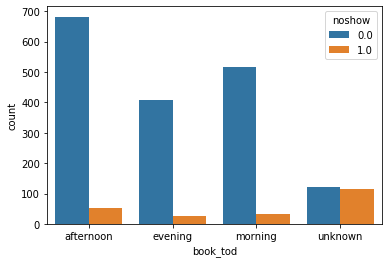

In [14]:
sns.countplot(x = "book_tod", hue = "noshow", data = noshow)

According to the graph, unknown book time of the day gets proportionally more no-shows than others.

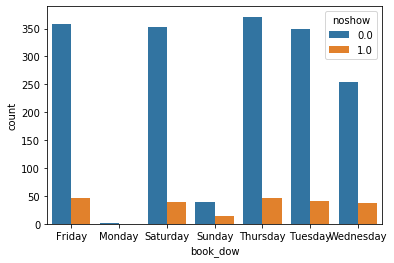

In [15]:
sns.countplot(x = "book_dow", hue = "noshow", data = noshow)

 According to the graph, Sunday book time of the week gets proportionally less no-shows than others.

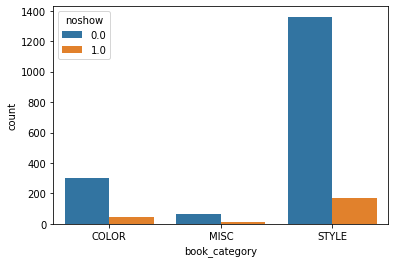

In [14]:
sns.countplot(x = "book_category", hue = "noshow", data = noshow)

According to the graph, Style service gets proportionally more no-shows than others.

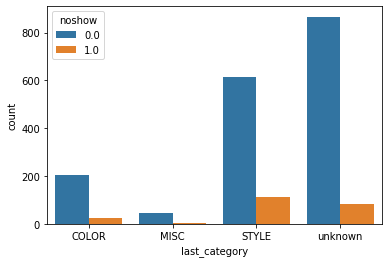

In [125]:
sns.countplot(x='last_category', hue = "noshow", data=noshow)

According to the graph, Style service as last servive gets proportionally more no-shows than others

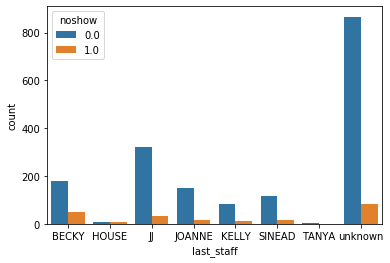

In [126]:
sns.countplot(x='last_staff', hue = "noshow", data=noshow)

According to the graph, Becky as last servive giver gets proportionally more no-shows than others

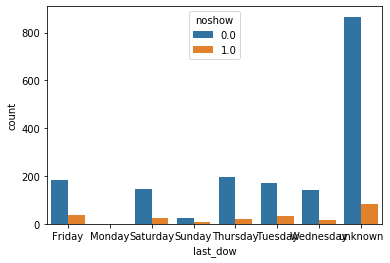

In [127]:
sns.countplot(x='last_dow', hue = "noshow", data=noshow)

According to the graph, Sunday book time of the week as last service gets proportionally less no-shows than others.

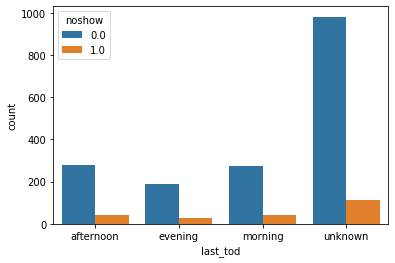

In [17]:
sns.countplot(x='last_tod', hue = "noshow", data=noshow)

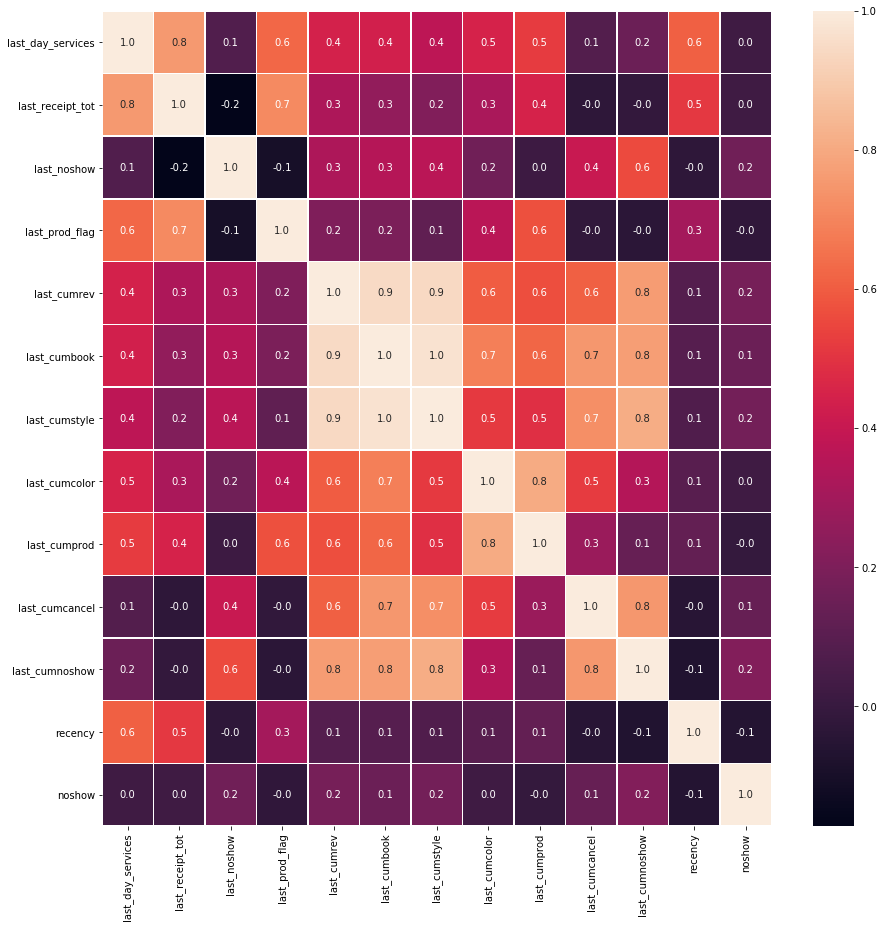

In [18]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(noshow.corr(), annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

Highly correlated featrures are:

last_cumbook, last_cumstyle, last_cumrev and last_cumnoshow

In [36]:
df_num = noshow.select_dtypes(include = ['float64'])
df_num.head()

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
0                0.0               0.0          0.0             0.0   
1                0.0               0.0          0.0             0.0   
2                2.0             262.0          0.0             1.0   
3                0.0               0.0          0.0             0.0   
4                1.0              35.0          0.0             0.0   

   last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
0          0.0           0.0            0.0            0.0           0.0   
1          0.0           0.0            0.0            0.0           0.0   
2        262.0           2.0            1.0            1.0           2.0   
3          0.0           0.0            0.0            0.0           0.0   
4         35.0           1.0            1.0            0.0           0.0   

   last_cumcancel  last_cumnoshow  recency  noshow  
0             0.0             0.0      0.0     0.0  
1             0.0             0.0      0.0     0.0  
2             0.0             0.0     35.0     0.0  
3             0.0             0.0      0.0     0.0  
4             0.0             0.0      9.0     0.0

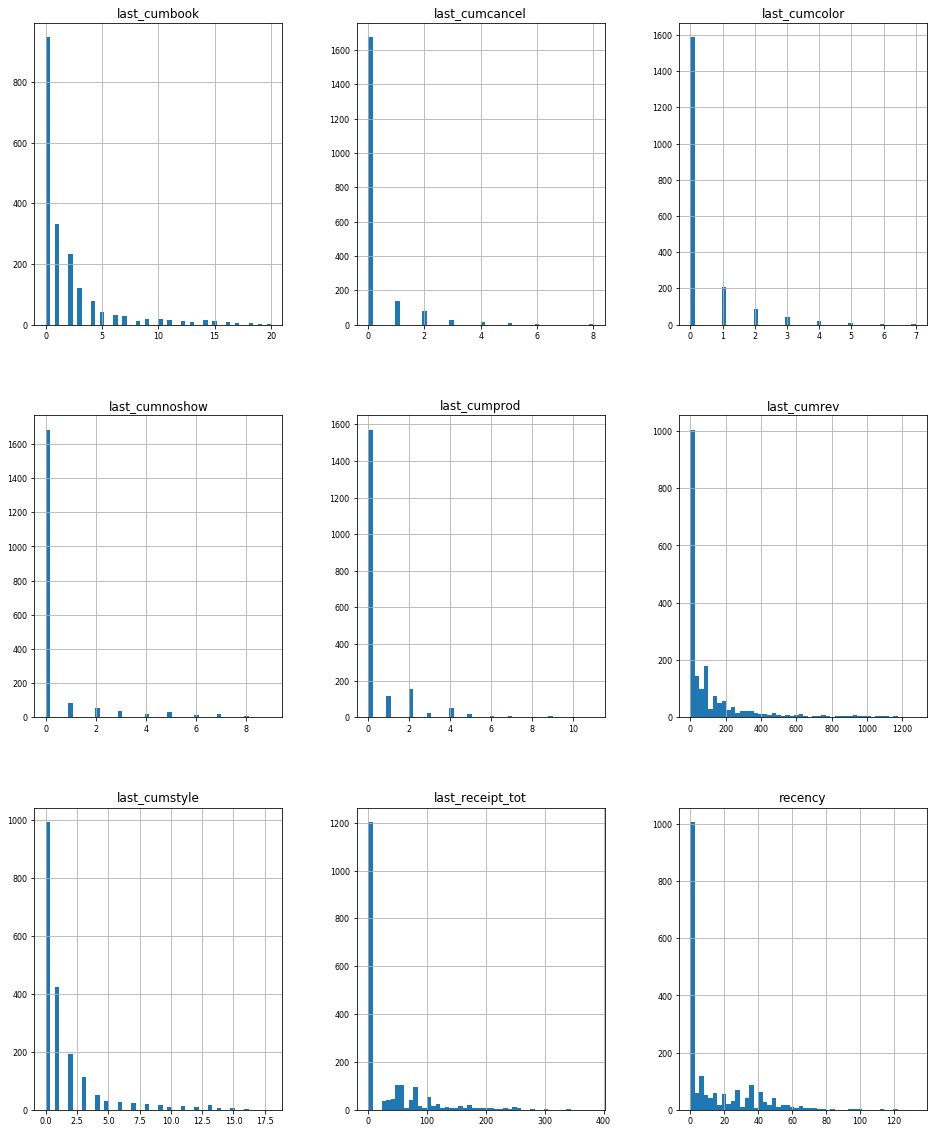

In [28]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

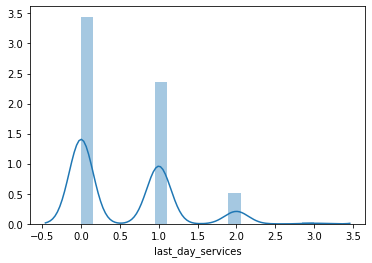

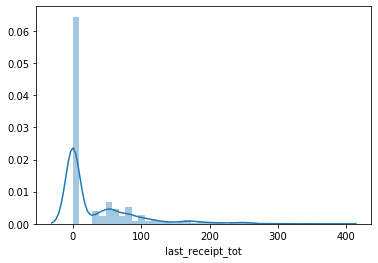

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

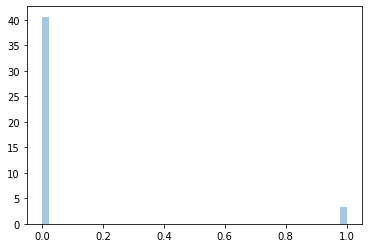

In [39]:
for var in numericVariableList:
    sns.distplot(df_num[var])
    plt.show()

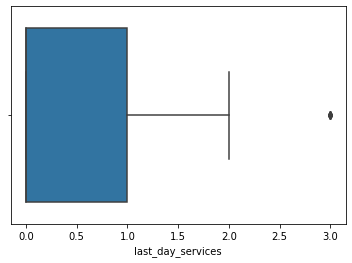

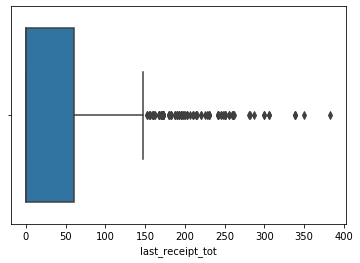

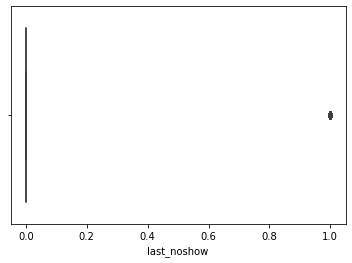

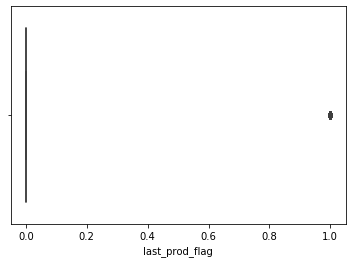

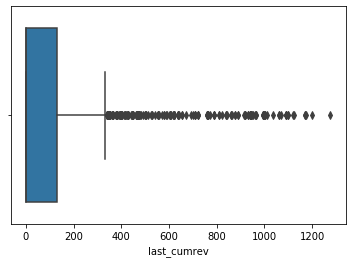

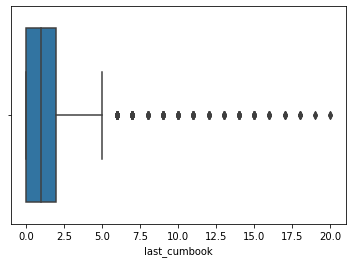

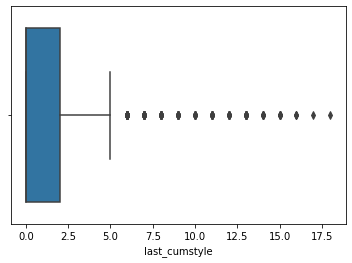

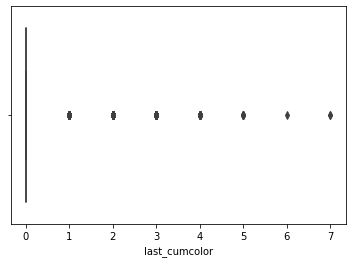

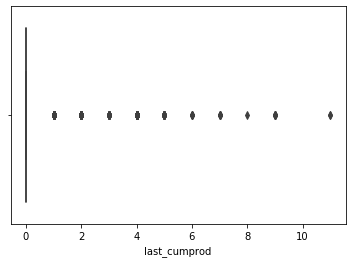

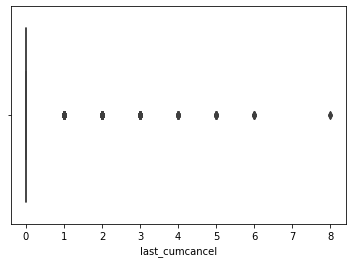

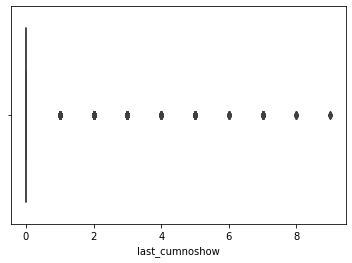

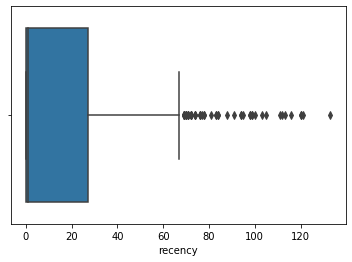

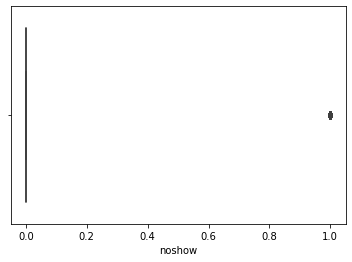

In [37]:

for var in numericVariableList:
    sns.boxplot(df_num[var])
    plt.show()

In [41]:
def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

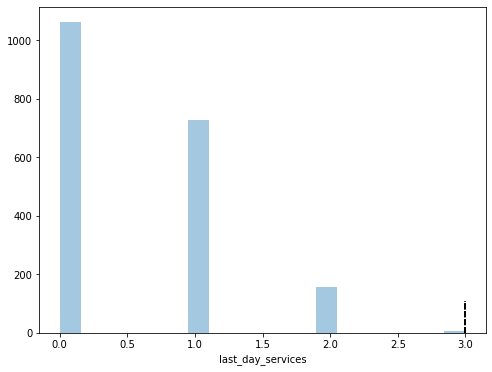

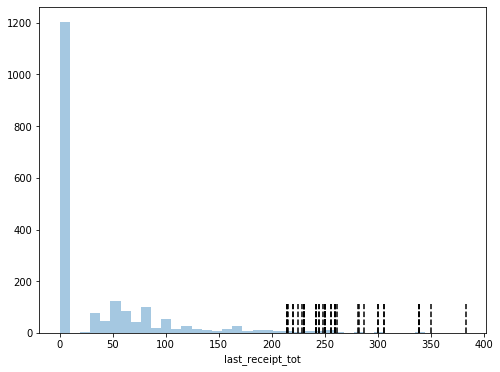

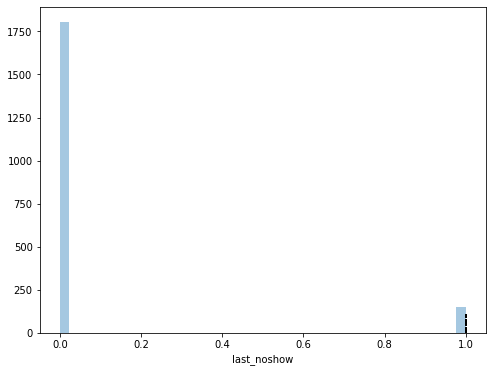

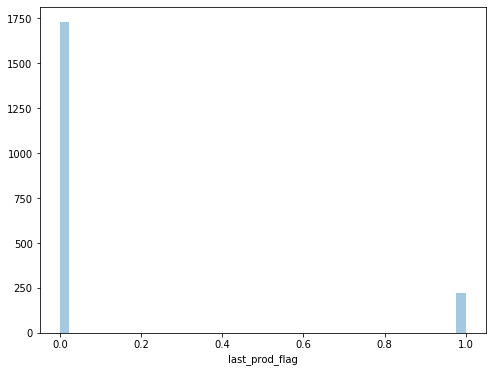

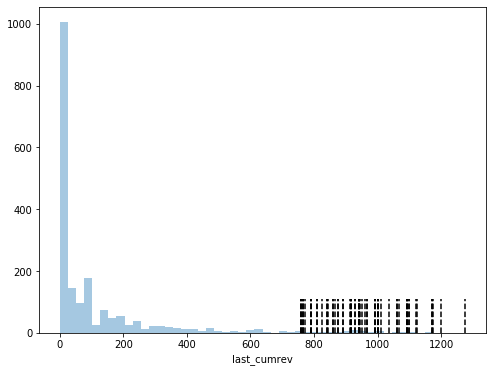

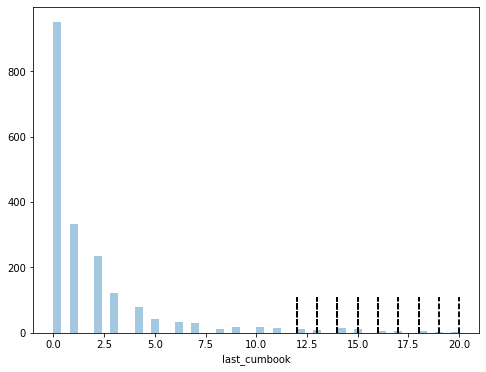

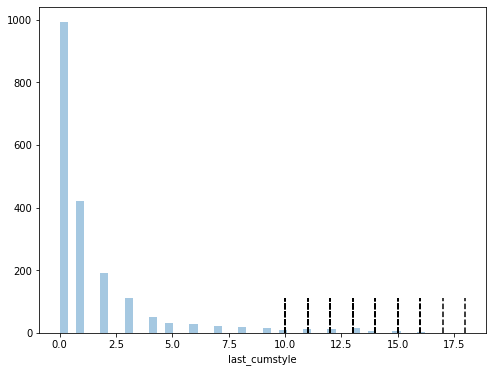

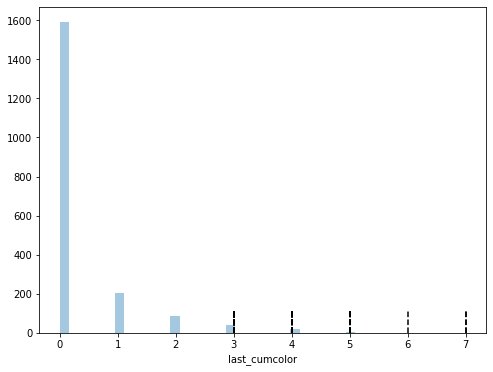

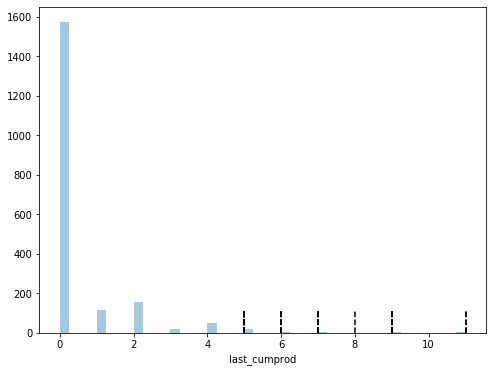

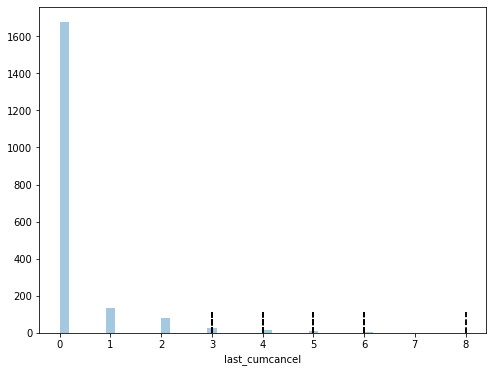

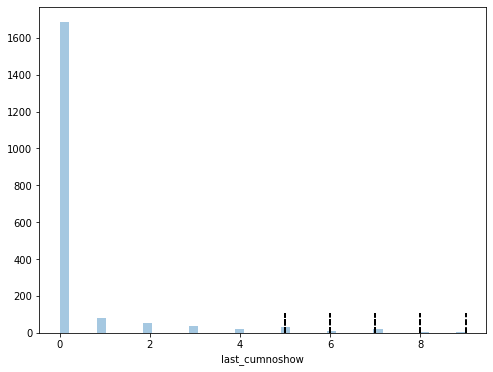

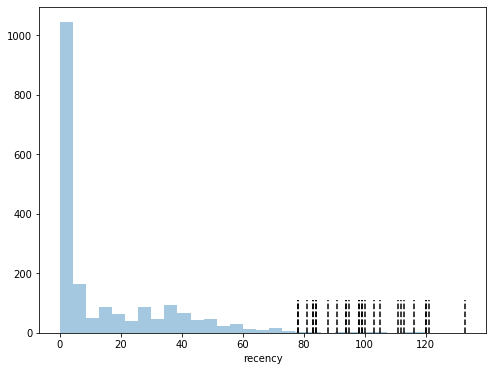

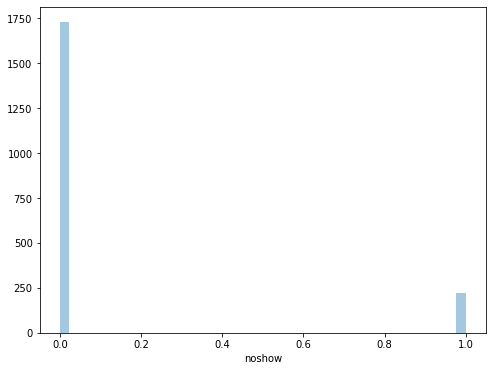

In [42]:
for var in numericVariableList:
    outlier_mask = out_std(df_num[var], nstd=3.0)
    plt.figure(figsize=(8,6))
    sns.distplot(df_num[var], kde=False);
    plt.vlines(df_num[var][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

The last step we need to take is to convert categorical variables such as book_tod, book_dow and others into dummies.

In [85]:
#convert categorical to dummies
noshowf = pd.get_dummies(noshow, columns=["book_tod","book_dow","book_category","book_staff","last_category","last_staff","last_dow","last_tod"])

In [86]:
noshowf.head()

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
0                0.0               0.0          0.0             0.0   
1                0.0               0.0          0.0             0.0   
2                2.0             262.0          0.0             1.0   
3                0.0               0.0          0.0             0.0   
4                1.0              35.0          0.0             0.0   

   last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
0          0.0           0.0            0.0            0.0           0.0   
1          0.0           0.0            0.0            0.0           0.0   
2        262.0           2.0            1.0            1.0           2.0   
3          0.0           0.0            0.0            0.0           0.0   
4         35.0           1.0            1.0            0.0           0.0   

   last_cumcancel  ...  last_dow_Saturday  last_dow_Sunday  last_dow_Thursday  \
0             0.0  ...                  0                0                  0   
1             0.0  ...                  0                0                  0   
2             0.0  ...                  0                0                  0   
3             0.0  ...                  0                0                  0   
4             0.0  ...                  0                0                  1   

   last_dow_Tuesday  last_dow_Wednesday  last_dow_unknown  last_tod_afternoon  \
0                 0                   0                 1                   0   
1                 0                   0                 1                   0   
2                 0                   1                 0                   0   
3                 0                   0                 1                   0   
4                 0                   0                 0                   1   

   last_tod_evening  last_tod_morning  last_tod_unknown  
0                 0                 0                 1  
1                 0                 0                 1  
2                 0                 1                 0  
3                 0                 0                 1  
4                 0                 0                 0  

[5 rows x 58 columns]

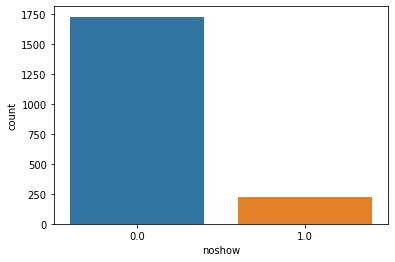

In [46]:
sns.countplot(x='noshow', data=noshowf) #Distribution of the dependent variable

In [81]:
noshowf.groupby('noshow').count()

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
noshow                                                                     
0.0                  1728              1728         1728            1728   
1.0                   224               224          224             224   

        last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
noshow                                                                          
0.0            1728          1728           1728           1728          1728   
1.0             224           224            224            224           224   

        last_cumcancel  ...  last_dow_Saturday  last_dow_Sunday  \
noshow                  ...                                       
0.0               1728  ...               1728             1728   
1.0                224  ...                224              224   

        last_dow_Thursday  last_dow_Tuesday  last_dow_Wednesday  \
noshow                                                            
0.0                  1728              1728                1728   
1.0                   224               224                 224   

        last_dow_unknown  last_tod_afternoon  last_tod_evening  \
noshow                                                           
0.0                 1728                1728              1728   
1.0                  224                 224               224   

        last_tod_morning  last_tod_unknown  
noshow                                      
0.0                 1728              1728  
1.0                  224               224  

[2 rows x 57 columns]

In [91]:
noshowf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 58 columns):
last_day_services        1952 non-null float64
last_receipt_tot         1952 non-null float64
last_noshow              1952 non-null float64
last_prod_flag           1952 non-null float64
last_cumrev              1952 non-null float64
last_cumbook             1952 non-null float64
last_cumstyle            1952 non-null float64
last_cumcolor            1952 non-null float64
last_cumprod             1952 non-null float64
last_cumcancel           1952 non-null float64
last_cumnoshow           1952 non-null float64
recency                  1952 non-null float64
noshow                   1952 non-null float64
book_tod_afternoon       1952 non-null int32
book_tod_evening         1952 non-null int32
book_tod_morning         1952 non-null int32
book_tod_unknown         1952 non-null int32
book_dow_Friday          1952 non-null int32
book_dow_Monday          1952 non-null int32
book_dow_Sat

In [93]:
noshowf.describe()

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
count        1952.000000       1952.000000  1952.000000     1952.000000   
mean            0.545082         35.782679     0.076332        0.114242   
std             0.658514         59.371877     0.265597        0.318186   
min             0.000000          0.000000     0.000000        0.000000   
25%             0.000000          0.000000     0.000000        0.000000   
50%             0.000000          0.000000     0.000000        0.000000   
75%             1.000000         60.000000     0.000000        0.000000   
max             3.000000        382.800000     1.000000        1.000000   

       last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
count  1952.000000   1952.000000    1952.000000    1952.000000   1952.000000   
mean    111.258197      1.906762       1.520492       0.325307      0.487193   
std     207.927702      3.315854       2.756585       0.827646      1.261275   
min       0.000000      0.000000       0.000000       0.000000      0.000000   
25%       0.000000      0.000000       0.000000       0.000000      0.000000   
50%       0.000000      1.000000       0.000000       0.000000      0.000000   
75%     132.000000      2.000000       2.000000       0.000000      0.000000   
max    1276.000000     20.000000      18.000000       7.000000     11.000000   

       last_cumcancel  ...  last_dow_Saturday  last_dow_Sunday  \
count     1952.000000  ...        1952.000000      1952.000000   
mean         0.280225  ...           0.088627         0.015881   
std          0.853646  ...           0.284277         0.125048   
min          0.000000  ...           0.000000         0.000000   
25%          0.000000  ...           0.000000         0.000000   
50%          0.000000  ...           0.000000         0.000000   
75%          0.000000  ...           0.000000         0.000000   
max          8.000000  ...           1.000000         1.000000   

       last_dow_Thursday  last_dow_Tuesday  last_dow_Wednesday  \
count        1952.000000       1952.000000         1952.000000   
mean            0.112705          0.102459            0.081967   
std             0.316313          0.303329            0.274385   
min             0.000000          0.000000            0.000000   
25%             0.000000          0.000000            0.000000   
50%             0.000000          0.000000            0.000000   
75%             0.000000          0.000000            0.000000   
max             1.000000          1.000000            1.000000   

       last_dow_unknown  last_tod_afternoon  last_tod_evening  \
count       1952.000000         1952.000000       1952.000000   
mean           0.486168            0.164447          0.112705   
std            0.499937            0.370775          0.316313   
min            0.000000            0.000000          0.000000   
25%            0.000000            0.000000          0.000000   
50%            0.000000            0.000000          0.000000   
75%            1.000000            0.000000          0.000000   
max            1.000000            1.000000          1.000000   

       last_tod_morning  last_tod_unknown  
count       1952.000000       1952.000000  
mean           0.162398          0.560451  
std            0.368910          0.496459  
min            0.000000          0.000000  
25%            0.000000          0.000000  
50%            0.000000          1.000000  
75%            0.000000          1.000000  
max            1.000000          1.000000  

[8 rows x 58 columns]

In [88]:
noshowf.iloc[:,13:] =noshowf.iloc[:,13:].astype("int")

In [94]:
noshowf.drop(columns=['noshow']).assign(noshow=noshowf['noshow'])

last_day_services  last_receipt_tot  last_noshow  last_prod_flag  \
0                   0.0               0.0          0.0             0.0   
1                   0.0               0.0          0.0             0.0   
2                   2.0             262.0          0.0             1.0   
3                   0.0               0.0          0.0             0.0   
4                   1.0              35.0          0.0             0.0   
...                 ...               ...          ...             ...   
1947                0.0               0.0          0.0             0.0   
1948                1.0              30.0          0.0             0.0   
1949                1.0              30.0          0.0             0.0   
1950                1.0              50.0          0.0             0.0   
1951                1.0              50.0          0.0             0.0   

      last_cumrev  last_cumbook  last_cumstyle  last_cumcolor  last_cumprod  \
0             0.0           0.0            0.0            0.0           0.0   
1             0.0           0.0            0.0            0.0           0.0   
2           262.0           2.0            1.0            1.0           2.0   
3             0.0           0.0            0.0            0.0           0.0   
4            35.0           1.0            1.0            0.0           0.0   
...           ...           ...            ...            ...           ...   
1947          0.0           0.0            0.0            0.0           0.0   
1948         30.0           1.0            1.0            0.0           0.0   
1949         30.0           1.0            1.0            0.0           0.0   
1950        130.0           3.0            3.0            0.0           0.0   
1951        130.0           3.0            3.0            0.0           0.0   

      last_cumcancel  ...  last_dow_Sunday  last_dow_Thursday  \
0                0.0  ...                0                  0   
1                0.0  ...                0                  0   
2                0.0  ...                0                  0   
3                0.0  ...                0                  0   
4                0.0  ...                0                  1   
...              ...  ...              ...                ...   
1947             0.0  ...                0                  0   
1948             0.0  ...                0                  1   
1949             0.0  ...                0                  1   
1950             1.0  ...                0                  0   
1951             1.0  ...                0                  0   

      last_dow_Tuesday  last_dow_Wednesday  last_dow_unknown  \
0                    0                   0                 1   
1                    0                   0                 1   
2                    0                   1                 0   
3                    0                   0                 1   
4                    0                   0                 0   
...                ...                 ...               ...   
1947                 0                   0                 1   
1948                 0                   0                 0   
1949                 0                   0                 0   
1950                 1                   0                 0   
1951                 1                   0                 0   

      last_tod_afternoon  last_tod_evening  last_tod_morning  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 1   
3                      0                 0                 0   
4                      1                 0                 0   
...                  ...               ...               ...   
1947                   0                 0                 0   
1948                   1                 0                 0   
1949                   1                 0

I finished the preprocessing and EDA

In [95]:
noshowf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 58 columns):
last_day_services        1952 non-null float64
last_receipt_tot         1952 non-null float64
last_noshow              1952 non-null float64
last_prod_flag           1952 non-null float64
last_cumrev              1952 non-null float64
last_cumbook             1952 non-null float64
last_cumstyle            1952 non-null float64
last_cumcolor            1952 non-null float64
last_cumprod             1952 non-null float64
last_cumcancel           1952 non-null float64
last_cumnoshow           1952 non-null float64
recency                  1952 non-null float64
noshow                   1952 non-null float64
book_tod_afternoon       1952 non-null int32
book_tod_evening         1952 non-null int32
book_tod_morning         1952 non-null int32
book_tod_unknown         1952 non-null int32
book_dow_Friday          1952 non-null int32
book_dow_Monday          1952 non-null int32
book_dow_Sat

# Gradient Boosting Model

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X = noshowf.iloc[:, noshowf.columns != 'noshow'].values # all the features
y = noshowf[['noshow']].values # dependent variable

Let's write the function that will perform data split (default = 1/3), model evaluation with cross-validation if needed and print the Accuracy and ROC-AUC scores along with the feature importance.

In [123]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


def modelfit(alg, X, y, split = 1/3, performCV=True, printFeatureImportance=True, cv_folds=5):
    
    # Train - test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = split, 
                                                        random_state = 666) # 2/3 - train, 1/3 - test
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)
    
    #Predict test set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)
    
    #Perform cross-validation on the full dataset:
    if performCV:
        cv_score = cross_val_score(alg, X, y, cv=cv_folds, scoring = "accuracy")
        cv_score_auc = cross_val_score(alg, X, y, cv=cv_folds, scoring = "roc_auc")
       
    #Print model report:
    print("\nModel Report")
    print("Test\Train split    : %.4g" % split)
    print("Accuracy (Train)    : %.4g" % accuracy_score(y_train, dtrain_predictions))
    print("Accuracy (Test)     : %.4g" % accuracy_score(y_test, dtest_predictions))
    print("AUC Score (Train)   : %f" % roc_auc_score(y_train, dtrain_predprob[:,1]))
    print("AUC Score (Test)    : %f" % roc_auc_score(y_test, dtest_predprob[:,1]))
    
    if performCV:
        print("CV Score (Accuracy) : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        print("CV Score (ROC-AUC)  : Mean - %.7g | Std - %.7g  | Min - %.7g | Max - %.7g" % (np.mean(cv_score_auc),np.std(cv_score_auc),np.min(cv_score_auc),np.max(cv_score_auc)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, list(noshowf.iloc[:, noshowf.columns != 'noshow'])).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected.


Model Report
Test\Train split    : 0.3333
Accuracy (Train)    : 0.9677
Accuracy (Test)     : 0.9032
AUC Score (Train)   : 0.953914
AUC Score (Test)    : 0.831426
CV Score (Accuracy) : Mean - 0.9118854 | Std - 0.002042125 | Min - 0.9102564 | Max - 0.9153846
CV Score (ROC-AUC)  : Mean - 0.8562682 | Std - 0.03074637  | Min - 0.8179519 | Max - 0.897971


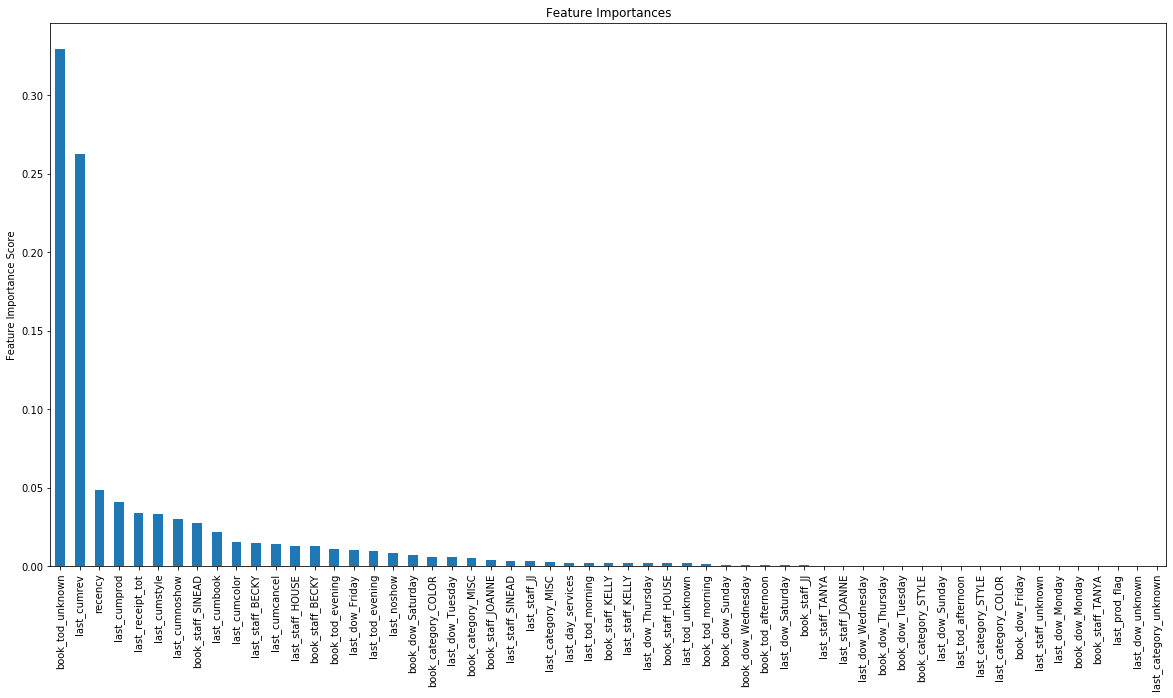

In [128]:
gbm0 = GradientBoostingClassifier(random_state=483)
modelfit(gbm0, X, y, cv_folds = 5)

Let's set some of the parameters to a fixed value and perform grid search with cross-validation on the whole dataset to identify a proper number of estimators (number of trees built on top of each other) based on the maximization of accuracy score rather than roc_auc.

In [130]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':np.arange(50,301,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_split=50,
                                                               min_samples_leaf=50,
                                                               max_depth=4,
                                                               max_features='sqrt',
                                                               random_state=483), 
param_grid = param_test1, scoring = 'accuracy',n_jobs=4, iid=False, cv=5)
gsearch1.fit(X,y)

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=50,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_...
                 

In [132]:

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.08357677, 0.08996115, 0.08437376, 0.09554205, 0.11708713,
         0.12546563, 0.17513494, 0.17692671, 0.17213893, 0.20286341,
         0.21223993, 0.19966669, 0.21502223, 0.22519717, 0.27525897,
         0.24095054, 0.25432   , 0.2611022 , 0.27346539, 0.28423929,
         0.33051567, 0.3372962 , 0.31475701, 0.31595426, 0.33929214,
         0.33510699]),
  'std_fit_time': array([0.01120284, 0.01419437, 0.00162019, 0.0026304 , 0.0065443 ,
         0.00589667, 0.01521896, 0.01591067, 0.01806879, 0.02525408,
         0.01491317, 0.01084089, 0.0169088 , 0.01818643, 0.01415015,
         0.00576129, 0.00973097, 0.00695016, 0.00739479, 0.00605091,
         0.05463696, 0.05647887, 0.00870788, 0.00353448, 0.00565603,
         0.01086513]),
  'mean_score_time': array([0.00119734, 0.00119677, 0.00159578, 0.00159526, 0.00099664,
         0.0013958 , 0.00200067, 0.00179377, 0.00199471, 0.00239315,
         0.00159407, 0.00199447, 0.00199428, 0.0021946 , 0.00259438,
     

The optimal n_estimators is 180. Let's use this number to build the final model.

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Test\Train split    : 0.3333
Accuracy (Train)    : 0.9508
Accuracy (Test)     : 0.914
AUC Score (Train)   : 0.949132
AUC Score (Test)    : 0.830231


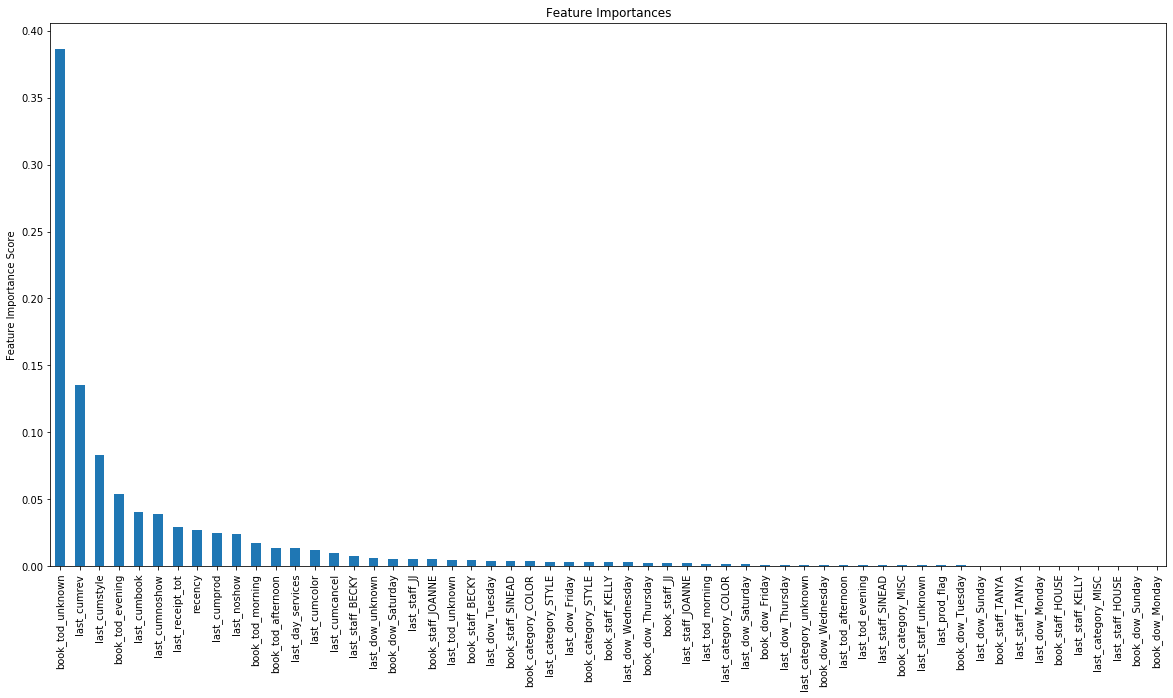

In [146]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, 
                                  min_samples_split=50,
                                  min_samples_leaf=50,
                                  max_depth=4,
                                  max_features='sqrt',
                                  n_estimators = 180,
                                  random_state=483)

modelfit(gbm1, X, y, performCV = False)

In [137]:
from sklearn.ensemble import RandomForestClassifier


C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column


Model Report
Test\Train split    : 0.3333
Accuracy (Train)    : 0.9839
Accuracy (Test)     : 0.9078
AUC Score (Train)   : 0.992999
AUC Score (Test)    : 0.835343
CV Score (Accuracy) : Mean - 0.8970201 | Std - 0.009995471 | Min - 0.8820513 | Max - 0.9104859
CV Score (ROC-AUC)  : Mean - 0.8549134 | Std - 0.02819997  | Min - 0.8217713 | Max - 0.8921002


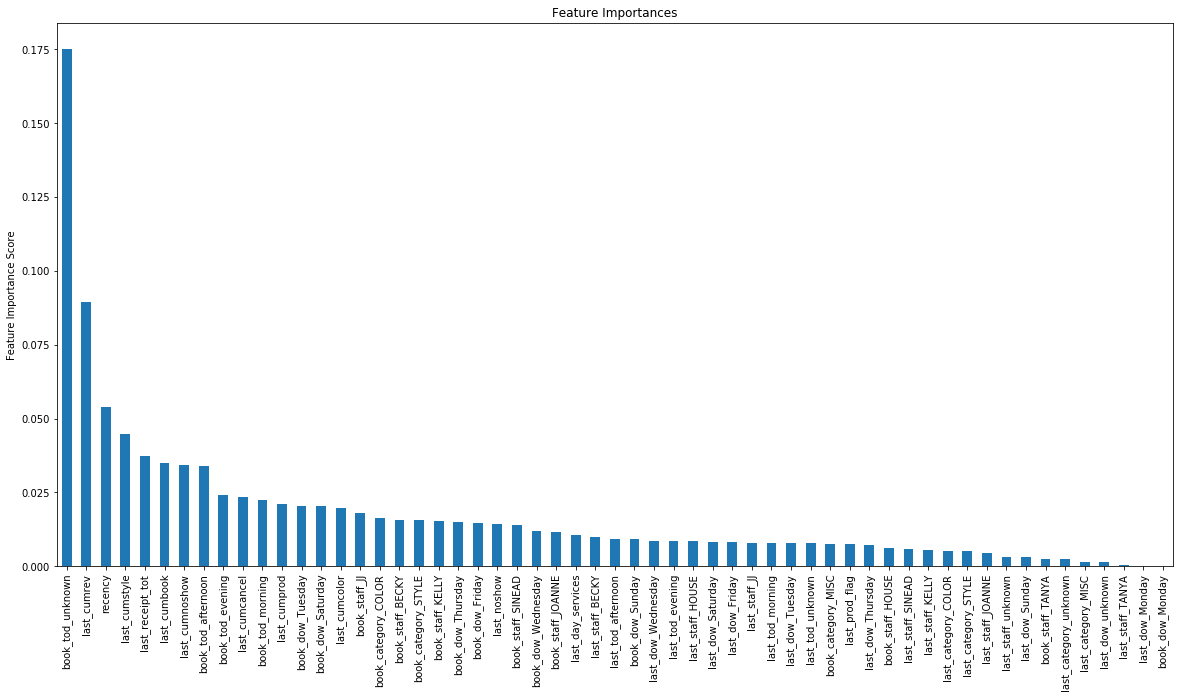

In [138]:
gbm1 = RandomForestClassifier(random_state=483)
modelfit(gbm1, X, y, cv_folds = 5)

In [141]:
param_test1 = {'n_estimators':np.arange(50,301,10)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 100, 
                                                               min_samples_split=50,
                                                               min_samples_leaf=50,
                                                               max_depth=4,
                                                               max_features='sqrt',
                                                               random_state=483), 
param_grid = param_test1, scoring = 'accuracy',n_jobs=4, iid=False, cv=5)
gsearch2.fit(X,y)

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=50,
                                              min_samples_split=50,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=483,
                                  

In [142]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.09235401, 0.1286561 , 0.14741125, 0.17314429, 0.17933421,
         0.19747338, 0.21542997, 0.2321979 , 0.26191225, 0.24555535,
         0.29420948, 0.28565555, 0.29739733, 0.29221826, 0.31276379,
         0.34029574, 0.35325499, 0.37638865, 0.44002233, 0.46495414,
         0.4440124 , 0.47851338, 0.4990737 , 0.48330832, 0.51562696,
         0.5062592 ]),
  'std_fit_time': array([0.00635748, 0.01119608, 0.00386622, 0.03796184, 0.02065042,
         0.00922732, 0.01255135, 0.0336592 , 0.03055455, 0.01159287,
         0.02525695, 0.03818896, 0.02480897, 0.00667539, 0.01488009,
         0.0121206 , 0.01071122, 0.01306265, 0.03993815, 0.05746578,
         0.02795051, 0.05420716, 0.05697379, 0.0226178 , 0.06617343,
         0.04513837]),
  'mean_score_time': array([0.00797887, 0.00897498, 0.009974  , 0.0121882 , 0.01195426,
         0.0121737 , 0.01634889, 0.0133719 , 0.017939  , 0.01476793,
         0.01954355, 0.01874371, 0.01695356, 0.01795211, 0.02154217,
     

C:\Users\dannyvaks\.conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



Model Report
Test\Train split    : 0.3333
Accuracy (Train)    : 0.8885
Accuracy (Test)     : 0.8786
AUC Score (Train)   : 0.857657
AUC Score (Test)    : 0.798320


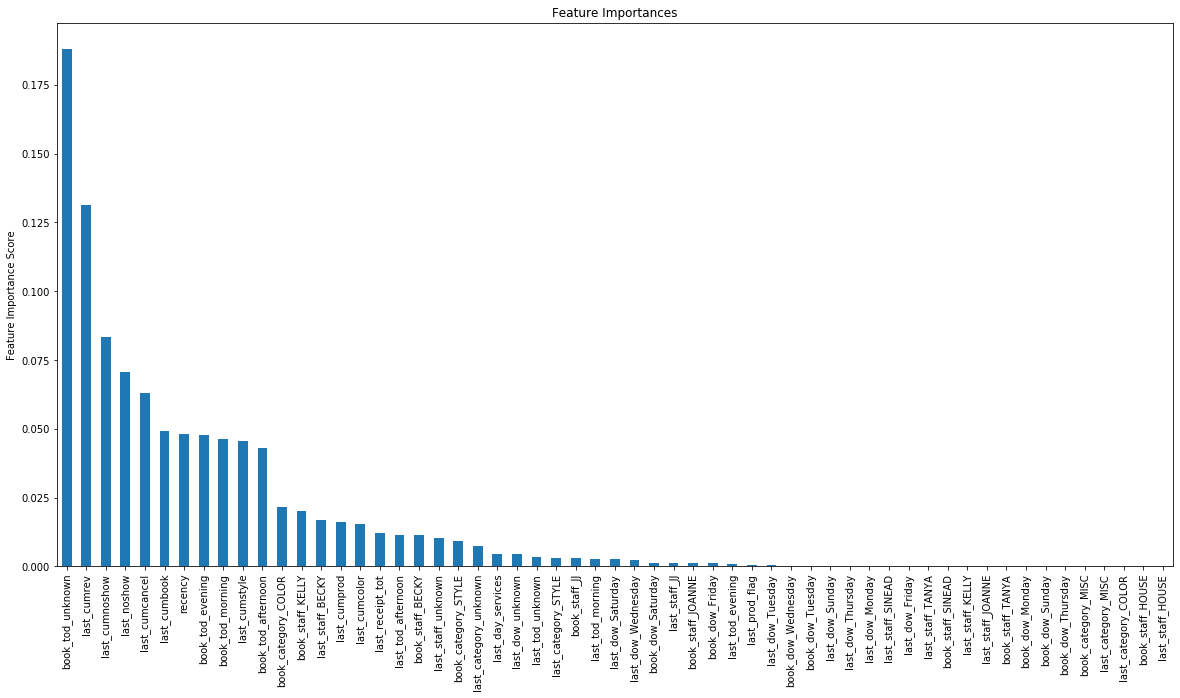

In [143]:
gbm1 = RandomForestClassifier(    min_samples_split=50,
                                  min_samples_leaf=50,
                                  max_depth=4,
                                  max_features='sqrt',
                                  n_estimators = 50,
                                  random_state=483)

modelfit(gbm1, X, y, performCV = False)